In [54]:
import pandas as pd

# Reload the CSV file
file_path = 'boxoffice_data_2024.csv'
boxoffice_data = pd.read_csv(file_path)

# Check for rows with zero or null values in the raw data
zero_or_null_raw_data = boxoffice_data[
    (boxoffice_data['Gross'].replace({r'\$': '', ',': ''}, regex=True) == '0') |  # Check for Gross as '0'
    boxoffice_data.isnull().any(axis=1)                                         # Check for nulls
]

# Print the rows with issues in the raw data if any
if not zero_or_null_raw_data.empty:
    print("Rows with zero or null values in the raw data:")
    print(zero_or_null_raw_data)
else:
    print("No rows with zero or null values in the raw data.")

# Clean the Gross column by removing the dollar sign and commas, then convert to numeric
boxoffice_data['Gross'] = boxoffice_data['Gross'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Group by 'Year' and calculate the number of movies and total gross per year
summary = boxoffice_data.groupby('Year').agg(
    quantity=('Title', 'count'),   # Count the number of movies (titles) in each year
    total_gross=('Gross', 'sum')  # Sum up the total gross in each year
).reset_index()

# Add a new column for the average gross by dividing total_gross by quantity
summary['average_gross'] = summary['total_gross'] / summary['quantity']

# Format the 'total_gross' and 'average_gross' columns to display as plain numbers without scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Display parts of summarized data 
summary.head()


No rows with zero or null values in the raw data.


,Year,quantity,total_gross,average_gross
0,1984,165,"3,348,437,253.00","20,293,559.11"
1,1985,180,"3,207,654,754.00","17,820,304.19"
2,1986,200,"3,202,850,115.00","16,014,250.57"
3,1987,200,"3,573,892,025.00","17,869,460.12"
4,1988,200,"3,641,024,553.00","18,205,122.77"


In [40]:
# Find the movie with the highest gross for each year
most_saled_movies = boxoffice_data.loc[
    boxoffice_data.groupby('Year')['Gross'].idxmax()
][['Year', 'Title', 'Gross']]

# Rename columns for clarity
most_saled_movies = most_saled_movies.rename(columns={'Title': 'Most Sold Movie', 'Gross': 'Highest Gross'})

# Sort the table by Year for readability
most_saled_movies = most_saled_movies.sort_values(by='Year').reset_index(drop=True)

# Display parts of the table
most_saled_movies.head()


,Year,Most Sold Movie,Highest Gross
0,1984,Beverly Hills Cop,"234,760,478.00"
1,1985,Out of Africa,"225,526,205.00"
2,1986,Top Gun,"176,913,085.00"
3,1987,Three Men and a Baby,"167,780,960.00"
4,1988,Who Framed Roger Rabbit,"238,092,487.00"


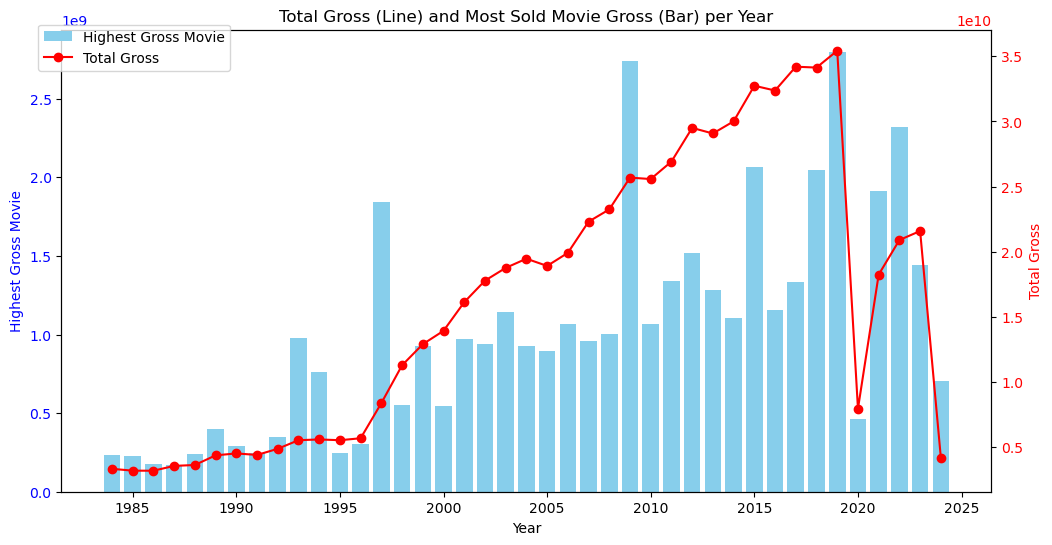

In [50]:
import matplotlib.pyplot as plt
# Merge the summary and most_saled_movies data for alignment
merged_data = summary.merge(most_saled_movies, on='Year')

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for the most sold movie's gross
ax1.bar(merged_data['Year'], merged_data['Highest Gross'], color='skyblue', label='Highest Gross Movie')
ax1.set_xlabel('Year')
ax1.set_ylabel('Highest Gross Movie', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total gross
ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], merged_data['total_gross'], color='red', marker='o', label='Total Gross')
ax2.set_ylabel('Total Gross', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legends
plt.title('Total Gross (Line) and Most Sold Movie Gross (Bar) per Year')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()
